In [1]:
import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import pandas as pd

import acquire
import prepare

from bs4 import BeautifulSoup as bs

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Step 1: Use repo list to acquire repo information

In [2]:
df = pd.read_csv('repo_list.csv')
df

,Unnamed: 0,0
0,0,typelevel/cats
1,1,nyaadevs/nyaa
2,2,httpcats/http.cat
3,3,AlexiaJM/Deep-learning-with-cats
4,4,sharkdp/bat
...,...,...
995,995,RomanKornev/dogs-vs-cats-redux
996,996,snap-research/CAT
997,997,datitran/Dogs-vs-Cats
998,998,bastakka/popcatindicator


### *Executed acquire in the terminal.*

## Step 2: Convert json file to dataframe

In [3]:
f = open('data.json')

data = json.load(f)

df_repos_raw = pd.DataFrame(data)

In [4]:
df_repos_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             1000 non-null   object
 1   language         940 non-null    object
 2   readme_contents  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


## Step 3: Prepare and clean

#### Check out structure or repos raw:

In [5]:
df_repos_raw.iloc[5][1]    
#0 is repo
#1 is language
#2 is readme_contents

'Scala'

#### Pull an observation from the raw repos to examine in depth and run all cleaning steps on:

In [6]:
string_test = df_repos_raw.iloc[4][2]
string_test

'<p align="center">\n  <img src="doc/logo-header.svg" alt="bat - a cat clone with wings"><br>\n  <a href="https://github.com/sharkdp/bat/actions?query=workflow%3ACICD"><img src="https://github.com/sharkdp/bat/workflows/CICD/badge.svg" alt="Build Status"></a>\n  <img src="https://img.shields.io/crates/l/bat.svg" alt="license">\n  <a href="https://crates.io/crates/bat"><img src="https://img.shields.io/crates/v/bat.svg?colorB=319e8c" alt="Version info"></a><br>\n  A <i>cat(1)</i> clone with syntax highlighting and Git integration.\n</p>\n\n<p align="center">\n  <a href="#syntax-highlighting">Key Features</a> •\n  <a href="#how-to-use">How To Use</a> •\n  <a href="#installation">Installation</a> •\n  <a href="#customization">Customization</a> •\n  <a href="#project-goals-and-alternatives">Project goals, alternatives</a><br>\n  [English]\n  [<a href="doc/README-zh.md">中文</a>]\n  [<a href="doc/README-ja.md">日本語</a>]\n  [<a href="doc/README-ko.md">한국어</a>]\n  [<a href="doc/README-ru.md">Русск

#### Create soup from the string object.

In [7]:
from bs4 import BeautifulSoup as bs
soup = bs(string_test, 'lxml').text

In [8]:
soup

'\n\n\n\n\n  A cat(1) clone with syntax highlighting and Git integration.\n\n\nKey Features •\n  How To Use •\n  Installation •\n  Customization •\n  Project goals, alternatives\n  [English]\n  [中文]\n  [日本語]\n  [한국어]\n  [Русский]\n\n\n### Sponsors\n\nA special *thank you* goes to our biggest sponsors:\n\n\n\nYour app, enterprise-ready.\n\nStart selling to enterprise customers with just a few lines of code.\n\nAdd Single Sign-On (and more) in minutes instead of months.\n\n\n### Syntax highlighting\n\n`bat` supports syntax highlighting for a large number of programming and markup\nlanguages:\n\n![Syntax highlighting example](https://imgur.com/rGsdnDe.png)\n\n### Git integration\n\n`bat` communicates with `git` to show modifications with respect to the index\n(see left side bar):\n\n![Git integration example](https://i.imgur.com/2lSW4RE.png)\n\n### Show non-printable characters\n\nYou can use the `-A`/`--show-all` option to show and highlight non-printable\ncharacters:\n\n![Non-printable 

#### First perform an initial scrubbing to remove pseky newline characters and embedded urls

In [9]:
# Remove r'(\n)+'
# Remove all https:
# remove all words longer than 14 characters (5 stds over normal)

In [10]:
#split the string into words
split_soup = soup.split(' ')
word_list = []

for word in split_soup:
    if re.search(r"\n", word):
        continue
    if re.match(r'https:', word):
        continue
    if len(word) > 14:
        continue
    else:
        word_list.append(word)

scrubbed = ' '.join(word_list)

In [11]:
scrubbed

' A cat(1) clone with syntax highlighting and Git Features  How To Use  Installation  Customization  Project goals,      special *thank you* goes to our biggest app, selling to enterprise customers with just a few lines of Single Sign-On (and more) in minutes instead of Syntax supports syntax highlighting for a large number of programming and highlighting Git communicates with `git` to show modifications with respect to the left side integration Show non-printable can use the option to show and highlight character Automatic default, `bat` pipes its own output to a pager (e.g. `less`) if the output is too large for one you would rather `bat` work like `cat` all the time (never page output), you can set as an option, either on the command line or in your configuration you intend to alias `cat` to `bat` in your shell configuration, you can use `alias cat=\'bat to preserve the default File with a pager set, you can still use `bat` to concatenate files `bat` detects a terminal (i.e. when yo

#### Basic clean (lower case, remove weird characters)

In [12]:
bc = prepare.basic_clean(scrubbed)
bc

" a cat1 clone with syntax highlighting and git features  how to use  installation  customization  project goals      special thank you goes to our biggest app selling to enterprise customers with just a few lines of single signon and more in minutes instead of syntax supports syntax highlighting for a large number of programming and highlighting git communicates with git to show modifications with respect to the left side integration show nonprintable can use the option to show and highlight character automatic default bat pipes its own output to a pager eg less if the output is too large for one you would rather bat work like cat all the time never page output you can set as an option either on the command line or in your configuration you intend to alias cat to bat in your shell configuration you can use alias cat'bat to preserve the default file with a pager set you can still use bat to concatenate files bat detects a terminal ie when you pipe into another process or into a file ba

#### Tokenize

In [13]:
tokens = prepare.tokenize(bc)
tokens

"a cat1 clone with syntax highlighting and git features how to use installation customization project goals special thank you goes to our biggest app selling to enterprise customers with just a few lines of single signon and more in minutes instead of syntax supports syntax highlighting for a large number of programming and highlighting git communicates with git to show modifications with respect to the left side integration show nonprintable can use the option to show and highlight character automatic default bat pipes its own output to a pager eg less if the output is too large for one you would rather bat work like cat all the time never page output you can set as an option either on the command line or in your configuration you intend to alias cat to bat in your shell configuration you can use alias cat ' bat to preserve the default file with a pager set you can still use bat to concatenate files bat detects a terminal ie when you pipe into another process or into a file bat will a

#### Lemmatize

In [14]:
lemmaz = prepare.lemmatize(tokens)
lemmaz

"a cat1 clone with syntax highlighting and git feature how to use installation customization project goal special thank you go to our biggest app selling to enterprise customer with just a few line of single signon and more in minute instead of syntax support syntax highlighting for a large number of programming and highlighting git communicates with git to show modification with respect to the left side integration show nonprintable can use the option to show and highlight character automatic default bat pipe it own output to a pager eg le if the output is too large for one you would rather bat work like cat all the time never page output you can set a an option either on the command line or in your configuration you intend to alias cat to bat in your shell configuration you can use alias cat ' bat to preserve the default file with a pager set you can still use bat to concatenate file bat detects a terminal ie when you pipe into another process or into a file bat will act a a dropin r

#### Remove Stopwords

In [15]:
almost = prepare.remove_stopwords(lemmaz)
almost

"cat1 clone syntax highlighting git feature use installation customization project goal special thank go biggest app selling enterprise customer line single signon minute instead syntax support syntax highlighting large number programming highlighting git communicates git show modification respect left side integration show nonprintable use option show highlight character automatic default bat pipe output pager eg le output large one would rather bat work like cat time never page output set option either command line configuration intend alias cat bat shell configuration use alias cat ' bat preserve default file pager set still use bat concatenate file bat detects terminal ie pipe another process file bat act dropin replacement cat fall back printing plain file content regardless pager option ' single file bat multiple file bat stdin determine syntax automatically note highlighting work syntax determined first line shebang curl stdin specify language yaml2json travisyml jsonpp bat l hi

#### Remove single letter words
- We noticed this was a problem and added this step in

In [16]:
no_smalls = []
for word in almost.split(' '):
    if len(word) < 3:
        no_smalls.append(word)
no_smalls        

['go',
 'eg',
 'le',
 "'",
 'ie',
 "'",
 'l',
 'n',
 'f',
 'g',
 "'",
 'f',
 "'",
 "'",
 "'",
 'x',
 'f',
 'f',
 'l',
 'l',
 'l',
 'c',
 "'",
 'bx',
 'l',
 '2',
 'cp',
 "'",
 '21',
 'cp',
 '11',
 'p',
 'ha',
 'c',
 'c',
 "'",
 'us',
 "'",
 'ha',
 'us',
 '16',
 '21',
 'us',
 'p',
 'cd',
 'go',
 'p',
 "'",
 "'",
 "'",
 'l',
 'us',
 'le',
 'le',
 'le',
 'x',
 'r',
 'f',
 'q',
 'x',
 'le',
 'le',
 'r',
 'le',
 '4',
 'le',
 "'",
 'us',
 'c',
 'c',
 'le',
 'le',
 '10',
 'le',
 "'",
 '0',
 'e',
 'f',
 'us',
 'c',
 '20']

In [17]:
cleaned = prepare.remove_smalls(almost)
cleaned

'cat1 clone syntax highlighting git feature use installation customization project goal special thank biggest app selling enterprise customer line single signon minute instead syntax support syntax highlighting large number programming highlighting git communicates git show modification respect left side integration show nonprintable use option show highlight character automatic default bat pipe output pager output large one would rather bat work like cat time never page output set option either command line configuration intend alias cat bat shell configuration use alias cat bat preserve default file pager set still use bat concatenate file bat detects terminal pipe another process file bat act dropin replacement cat fall back printing plain file content regardless pager option single file bat multiple file bat stdin determine syntax automatically note highlighting work syntax determined first line shebang curl stdin specify language yaml2json travisyml jsonpp bat highlight nonprintab

#### Bringing it altogether on a single string

In [18]:
full_clean = prepare.full_clean(string_test)
full_clean

'cat1 clone syntax highlighting git feature use installation customization project goal special thank biggest app selling enterprise customer line single signon minute instead syntax support syntax highlighting large number programming highlighting git communicates git show modification respect left side integration show nonprintable use option show highlight character automatic default bat pipe output pager output large one would rather bat work like cat time never page output set option either command line configuration intend alias cat bat shell configuration use alias cat bat preserve default file pager set still use bat concatenate file bat detects terminal pipe another process file bat act dropin replacement cat fall back printing plain file content regardless pager option single file bat multiple file bat stdin determine syntax automatically note highlighting work syntax determined first line shebang curl stdin specify language yaml2json travisyml jsonpp bat highlight nonprintab

#### Brining it all together on the entire df

In [19]:
df_cleaned = prepare.df_cleaner(df_repos_raw)

In [20]:
df_cleaned

,repo,language,readme_contents,cleaned
0,typelevel/cats,Scala,## Cats\n\n![Cats graphic](https://typelevel.o...,scala version continuous contributor open libr...
1,nyaadevs/nyaa,Python,# NyaaV2 [![Build Status](https://travis-ci.or...,nyaav2 build setting project python feature us...
2,httpcats/http.cat,JavaScript,# http.cat [![Build Status](https://travis-ci...,httpcat build cat website hosted code older ve...
3,AlexiaJM/Deep-learning-with-cats,Python,# Deep-learning-with-cats\n\nThis repository i...,repository toy project gain experience buildin...
4,sharkdp/bat,Rust,"<p align=""center"">\n <img src=""doc/logo-heade...",cat1 clone syntax highlighting git feature use...
...,...,...,...,...
995,RomanKornev/dogs-vs-cats-redux,Jupyter Notebook,# Dogs vs Cats\nPredict whether a given image ...,dog whether given image cat dog 997 accuracy b...
996,snap-research/CAT,Python,# CAT\n[CVPR](https://openaccess.thecvf.com/co...,tutorial method used mobile implementation met...
997,datitran/Dogs-vs-Cats,Jupyter Notebook,# Dogs-vs-Cats\n\nA fun project to differentia...,fun project differentiate dog kaggle create da...
998,bastakka/popcatindicator,Shell,# popcatindicator\nVolume indicator with Cat p...,indicator cat pop theme step one clone step tw...


---

# Additional Dataframe Prep and Cleaning

##### Step 1: Loaded libraries at the top

##### Step 2: Run acquire on repo list:

*Run this in the terminal, then run the following:*

In [21]:
df = acquire.json_to_df()

##### Step 3: Prepare!

In [22]:
df_cleaned = prepare.df_cleaner(df)

## Examine Data

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             1000 non-null   object
 1   language         940 non-null    object
 2   readme_contents  1000 non-null   object
 3   cleaned          1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


Check on the nulls.

In [25]:
df_cleaned_no_nulls = df_cleaned[~df_cleaned.language.isnull()]
df_cleaned_no_nulls

,repo,language,readme_contents,cleaned
0,typelevel/cats,Scala,## Cats\n\n![Cats graphic](https://typelevel.o...,scala version continuous contributor open libr...
1,nyaadevs/nyaa,Python,# NyaaV2 [![Build Status](https://travis-ci.or...,nyaav2 build setting project python feature us...
2,httpcats/http.cat,JavaScript,# http.cat [![Build Status](https://travis-ci...,httpcat build cat website hosted code older ve...
3,AlexiaJM/Deep-learning-with-cats,Python,# Deep-learning-with-cats\n\nThis repository i...,repository toy project gain experience buildin...
4,sharkdp/bat,Rust,"<p align=""center"">\n <img src=""doc/logo-heade...",cat1 clone syntax highlighting git feature use...
...,...,...,...,...
995,RomanKornev/dogs-vs-cats-redux,Jupyter Notebook,# Dogs vs Cats\nPredict whether a given image ...,dog whether given image cat dog 997 accuracy b...
996,snap-research/CAT,Python,# CAT\n[CVPR](https://openaccess.thecvf.com/co...,tutorial method used mobile implementation met...
997,datitran/Dogs-vs-Cats,Jupyter Notebook,# Dogs-vs-Cats\n\nA fun project to differentia...,fun project differentiate dog kaggle create da...
998,bastakka/popcatindicator,Shell,# popcatindicator\nVolume indicator with Cat p...,indicator cat pop theme step one clone step tw...


In [26]:
sample_unclean = df_cleaned_no_nulls.readme_contents[999]
sample_unclean

'# Throwdown_bot\nCloud Animation Throwdown (CAT) Bot. \n\nsource from http://tiny.cc/AT_Beta\n'

In [27]:
len(sample_unclean)

90

In [28]:
sample_clean = df_cleaned_no_nulls.cleaned[999]
sample_clean

'animation throwdown cat bot'

In [29]:
len(sample_clean)

27

In [30]:
df = df_cleaned_no_nulls.copy()

In [31]:
df.language.value_counts()

Scala               164
Python              162
JavaScript          154
Jupyter Notebook     47
Java                 41
                   ... 
Roff                  1
Reason                1
SourcePawn            1
Haxe                  1
KiCad                 1
Name: language, Length: 62, dtype: int64

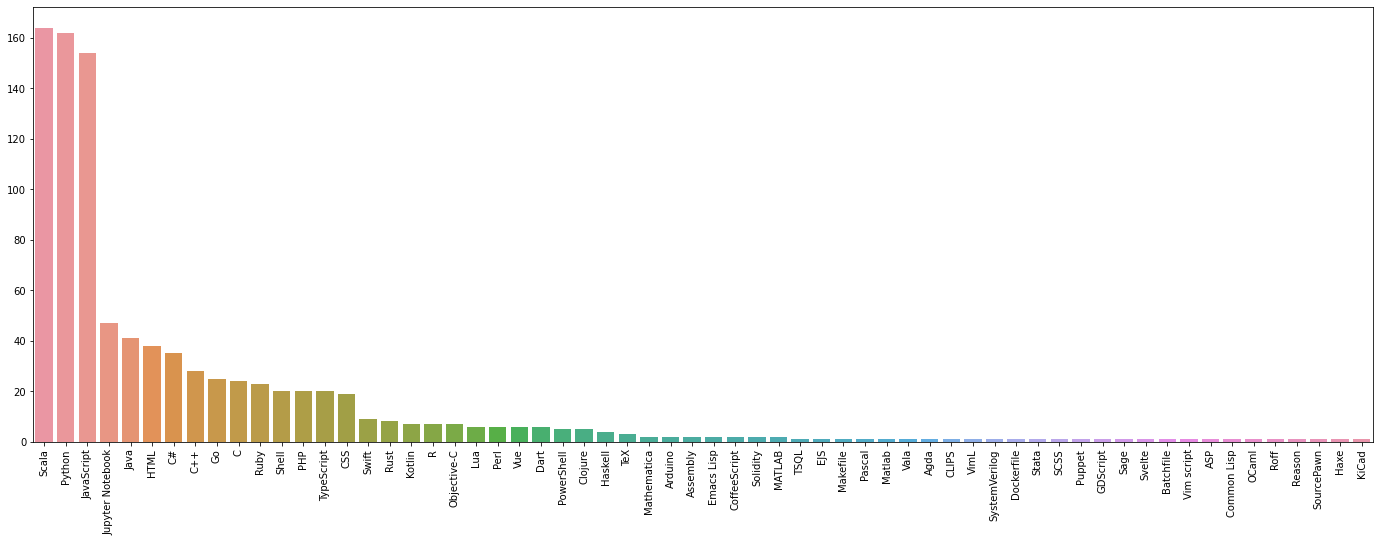

In [32]:
plt.figure(figsize = (24,8))
sns.barplot(x=df.language.value_counts().index, y = df.language.value_counts().values)
plt.xticks(rotation=90)
plt.show()

In [33]:
string_lengths = []
for i in df.cleaned:
    string_lengths.append(len(i))
string_lengths.sort()

In [34]:
df

,repo,language,readme_contents,cleaned
0,typelevel/cats,Scala,## Cats\n\n![Cats graphic](https://typelevel.o...,scala version continuous contributor open libr...
1,nyaadevs/nyaa,Python,# NyaaV2 [![Build Status](https://travis-ci.or...,nyaav2 build setting project python feature us...
2,httpcats/http.cat,JavaScript,# http.cat [![Build Status](https://travis-ci...,httpcat build cat website hosted code older ve...
3,AlexiaJM/Deep-learning-with-cats,Python,# Deep-learning-with-cats\n\nThis repository i...,repository toy project gain experience buildin...
4,sharkdp/bat,Rust,"<p align=""center"">\n <img src=""doc/logo-heade...",cat1 clone syntax highlighting git feature use...
...,...,...,...,...
995,RomanKornev/dogs-vs-cats-redux,Jupyter Notebook,# Dogs vs Cats\nPredict whether a given image ...,dog whether given image cat dog 997 accuracy b...
996,snap-research/CAT,Python,# CAT\n[CVPR](https://openaccess.thecvf.com/co...,tutorial method used mobile implementation met...
997,datitran/Dogs-vs-Cats,Jupyter Notebook,# Dogs-vs-Cats\n\nA fun project to differentia...,fun project differentiate dog kaggle create da...
998,bastakka/popcatindicator,Shell,# popcatindicator\nVolume indicator with Cat p...,indicator cat pop theme step one clone step tw...


In [35]:
df['cleaned_length'] = df.cleaned.str.split(' ').str.len()

In [36]:
df[df.cleaned_length < 5]

,repo,language,readme_contents,cleaned,cleaned_length
11,Luohuayu/CatServer,Java,,,1
40,typelevel/cats-parse,Scala,docs/index.md,docsindexmd,1
45,udacity/ud989-cat-clicker-ko-starter,HTML,ud989-cat-clicker-ko-starter\n================...,,1
49,kastnerkyle/kaggle-dogs-vs-cats,Python,kaggle-cifar10\n==============\n\nCode for Kag...,kaggle dog cat,3
54,maples1993/Cats_vs_Dogs,Python,# Cats_vs_Dogs\n\n运行train.py\nLogs_1是我自己运行1万步的...,,1
...,...,...,...,...,...
963,dcarriger/cat-repo,Python,,,1
978,wzyanqi/dogs-vs-cats,Jupyter Notebook,# dogs-vs-cats\n[猫狗大战](https://www.kaggle.com/...,file3csv modelpng 25pdf,3
980,hawkrai/CATSdesigner,C#,# CATSdesigner\n,,1
984,kdszafranski/omicron_express_review,JavaScript,# Node-Express with Cats!\n,nodeexpress,1


In [37]:
df.cleaned_length.describe()

count     940.000000
mean      151.524468
std       431.049101
min         1.000000
25%        16.000000
50%        57.000000
75%       157.250000
max      9911.000000
Name: cleaned_length, dtype: float64

In [38]:
cleaned_length = df.cleaned_length.values

In [39]:
iqr_list = []
k=3
dict_list={}
variable = df['cleaned_length']
q1 = variable.quantile(.25)
q2 = variable.median()
q3 = variable.quantile(.75)
irq = k * (q3 - q1)
high_outlier_cutoff = q3 + irq
if (q1 - irq) > 0:
    low_outlier_cutoff = q1 - irq
else:
    low_outlier_cutoff = 0
dict_list['Variable'] = col
dict_list['Low Outliers'] = low_outlier_cutoff
dict_list['25% Quantile'] = q1
dict_list['Median'] = q2
dict_list['75% Quantile'] = q3
dict_list['High Outliers'] = high_outlier_cutoff
iqr_list.append(dict_list)
pd.DataFrame(iqr_list).set_index('Variable')

NameError: name 'col' is not defined

In [40]:
df[df.cleaned_length < 10]

,repo,language,readme_contents,cleaned,cleaned_length
11,Luohuayu/CatServer,Java,,,1
13,tpolecat/natchez,Scala,# Natchez Trace\n\n[![Discord](https://img.shi...,natchez chat distributed tracing library proceed,6
31,chenyuntc/pytorch-best-practice,Python,# PyTorch 实践指南 \n\n\n\n本文是文章[PyTorch实践指南](http...,pytorch pytorch install classifier mainpy trai...,9
40,typelevel/cats-parse,Scala,docs/index.md,docsindexmd,1
45,udacity/ud989-cat-clicker-ko-starter,HTML,ud989-cat-clicker-ko-starter\n================...,,1
...,...,...,...,...,...
978,wzyanqi/dogs-vs-cats,Jupyter Notebook,# dogs-vs-cats\n[猫狗大战](https://www.kaggle.com/...,file3csv modelpng 25pdf,3
980,hawkrai/CATSdesigner,C#,# CATSdesigner\n,,1
984,kdszafranski/omicron_express_review,JavaScript,# Node-Express with Cats!\n,nodeexpress,1
989,wangdabaoqq/VueCnode,Vue,# VueCnode\n[![Build Status](https://www.travi...,promise http npm npm run npm run,7


In [41]:
df[df.repo == 'notwaldorf/cat-dns']

,repo,language,readme_contents,cleaned,cleaned_length
50,notwaldorf/cat-dns,JavaScript,cat-dns\n=======\n\nThe Internet needs more ca...,internet need cat dns server authority thing i...,206


In [42]:
import numpy as np
np.quantile(df.cleaned_length, .20)

10.0

##### We are going to drop the bottom 20% and then use that.

In [43]:
df_working = df[df.cleaned_length > 9]
df_working

,repo,language,readme_contents,cleaned,cleaned_length
0,typelevel/cats,Scala,## Cats\n\n![Cats graphic](https://typelevel.o...,scala version continuous contributor open libr...,525
1,nyaadevs/nyaa,Python,# NyaaV2 [![Build Status](https://travis-ci.or...,nyaav2 build setting project python feature us...,493
2,httpcats/http.cat,JavaScript,# http.cat [![Build Status](https://travis-ci...,httpcat build cat website hosted code older ve...,85
3,AlexiaJM/Deep-learning-with-cats,Python,# Deep-learning-with-cats\n\nThis repository i...,repository toy project gain experience buildin...,206
4,sharkdp/bat,Rust,"<p align=""center"">\n <img src=""doc/logo-heade...",cat1 clone syntax highlighting git feature use...,1436
...,...,...,...,...,...
993,imfing/keras-flask-deploy-webapp,JavaScript,# Deploy Keras Model with Flask as Web App in ...,deploy kera model flask web app pretty customi...,140
995,RomanKornev/dogs-vs-cats-redux,Jupyter Notebook,# Dogs vs Cats\nPredict whether a given image ...,dog whether given image cat dog 997 accuracy b...,96
996,snap-research/CAT,Python,# CAT\n[CVPR](https://openaccess.thecvf.com/co...,tutorial method used mobile implementation met...,441
997,datitran/Dogs-vs-Cats,Jupyter Notebook,# Dogs-vs-Cats\n\nA fun project to differentia...,fun project differentiate dog kaggle create da...,28


<AxesSubplot:>

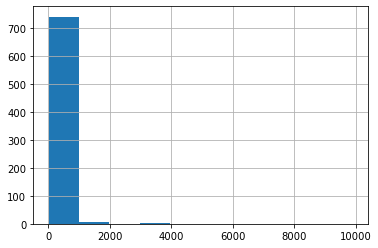

In [44]:
df_working.cleaned_length.hist()

# UNIVARIATE EXPLORATION
1. Remove Nulls
2. Create word count column
3. Run univariate stats on language (target) and word column

In [45]:
df_working.language.value_counts()

Scala               148
Python              131
JavaScript          123
Jupyter Notebook     35
HTML                 28
C++                  25
C                    22
C#                   22
Go                   21
Java                 20
Ruby                 20
Shell                18
TypeScript           17
PHP                  16
CSS                  12
Rust                  8
Kotlin                6
Swift                 6
R                     6
Clojure               5
Objective-C           5
Haskell               4
Lua                   4
Dart                  4
Vue                   3
Perl                  3
PowerShell            3
Assembly              2
MATLAB                2
CoffeeScript          2
TeX                   2
Emacs Lisp            2
SystemVerilog         1
Dockerfile            1
Mathematica           1
Solidity              1
Makefile              1
Matlab                1
EJS                   1
Pascal                1
Vala                  1
Agda            

In [46]:
df_working.language.value_counts()[df_working.language.value_counts()<6].sum()

69

----

# WRANGLE & UNIVARIATE (NO SPLIT)

In [47]:
from wrangle import cat_wrangle

In [48]:
X_train, y_train, X_validate, y_validate, X_test, y_test, df, df_languages = cat_wrangle()

Removed 60 rows with empty Readmes.
Removed 187 rows with Readmes < 10 words long.
Train = 421 rows (56.0%) | Validate = 181 rows (24.0%) | Test = 151 rows (20.0%)


In [49]:
df

,repo,cleaned,cleaned_length,language_group
0,typelevel/cats,scala version continuous contributor open libr...,525,Scala
1,nyaadevs/nyaa,nyaav2 build setting project python feature us...,493,Python
2,httpcats/http.cat,httpcat build cat website hosted code older ve...,85,JavaScript
3,AlexiaJM/Deep-learning-with-cats,repository toy project gain experience buildin...,206,Python
4,sharkdp/bat,cat1 clone syntax highlighting git feature use...,1436,Other
...,...,...,...,...
993,imfing/keras-flask-deploy-webapp,deploy kera model flask web app pretty customi...,140,JavaScript
995,RomanKornev/dogs-vs-cats-redux,dog whether given image cat dog 997 accuracy b...,96,Other
996,snap-research/CAT,tutorial method used mobile implementation met...,441,Python
997,datitran/Dogs-vs-Cats,fun project differentiate dog kaggle create da...,28,Other


In [50]:
df_languages

,readme_contents,language
0,## Cats\n\n![Cats graphic](https://typelevel.o...,Scala
1,# NyaaV2 [![Build Status](https://travis-ci.or...,Python
2,# http.cat [![Build Status](https://travis-ci...,JavaScript
3,# Deep-learning-with-cats\n\nThis repository i...,Python
4,"<p align=""center"">\n <img src=""doc/logo-heade...",Rust
...,...,...
993,# Deploy Keras Model with Flask as Web App in ...,JavaScript
995,# Dogs vs Cats\nPredict whether a given image ...,Jupyter Notebook
996,# CAT\n[CVPR](https://openaccess.thecvf.com/co...,Python
997,# Dogs-vs-Cats\n\nA fun project to differentia...,Jupyter Notebook


In [52]:
df.language_group.value_counts()

Other         351
Scala         148
Python        131
JavaScript    123
Name: language_group, dtype: int64

<AxesSubplot:xlabel='language_group', ylabel='Count'>

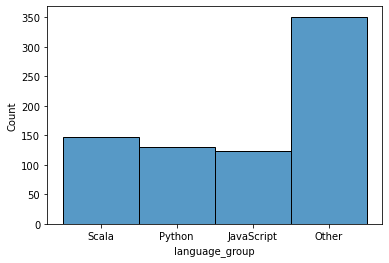

In [54]:
sns.histplot(df.language_group)

In [55]:
df[df.cleaned_length > 10000]

,repo,cleaned,cleaned_length,language_group


In [56]:
df_max = df[df.repo == 'fourkbomb/u-boot']

In [57]:
pd.set_option('display.max_colwidth', None)

In [58]:
df_max.cleaned

549    copyright 2000 wolfgang denk denx software engineering directory contains source code uboot boot loader board based powerpc arm mips several installed boot rom used test hardware download run development uboot closely related linux part source code originate linux source tree file common special provision made booting linux attention paid make software extendable instance monitor command call interface easy new command also instead permanently adding rarely instance hardware test utility monitor run general board configuration option exists tested extent fact many used production case problem see changelog file find specific port addition various maintainer throughout uboot source identifying people responsible various board august 2010 longer changelog file uboot source tree however created git log get case question problem contribution send message uboot mailing list also archive previous mailing list please search archive asking see get source uboot source code maintained git

In [59]:
df.cleaned_length.describe()

count     753.000000
mean      188.282869
std       474.556527
min        10.000000
25%        37.000000
50%        93.000000
75%       192.000000
max      9911.000000
Name: cleaned_length, dtype: float64

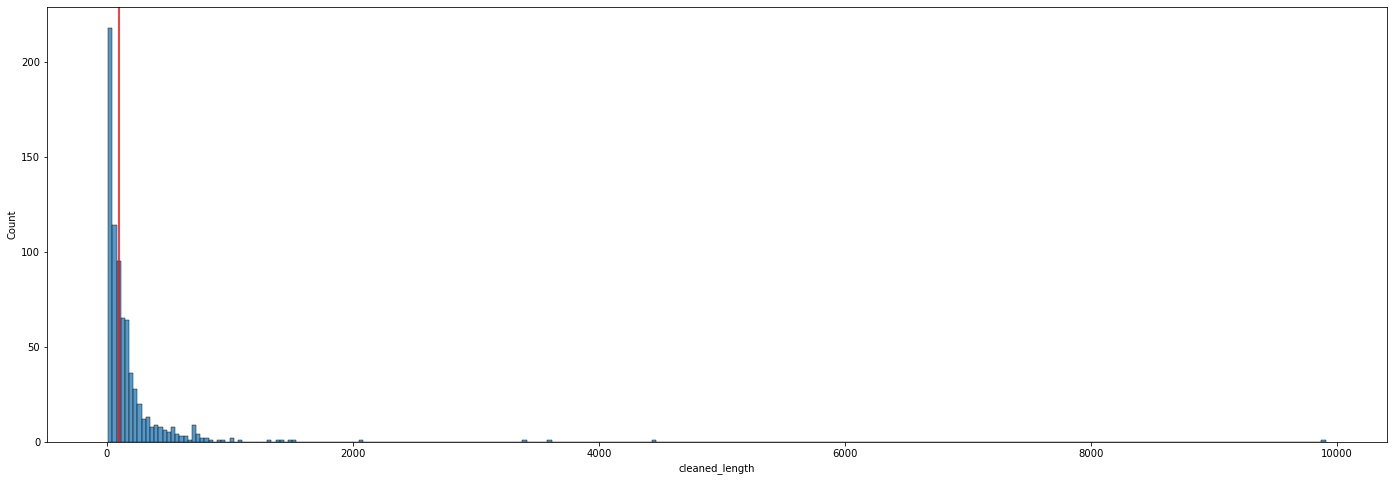

In [60]:
plt.figure(figsize = (24,8))
sns.histplot(x=df.cleaned_length)
plt.axvline(94, c = 'red')
plt.show()

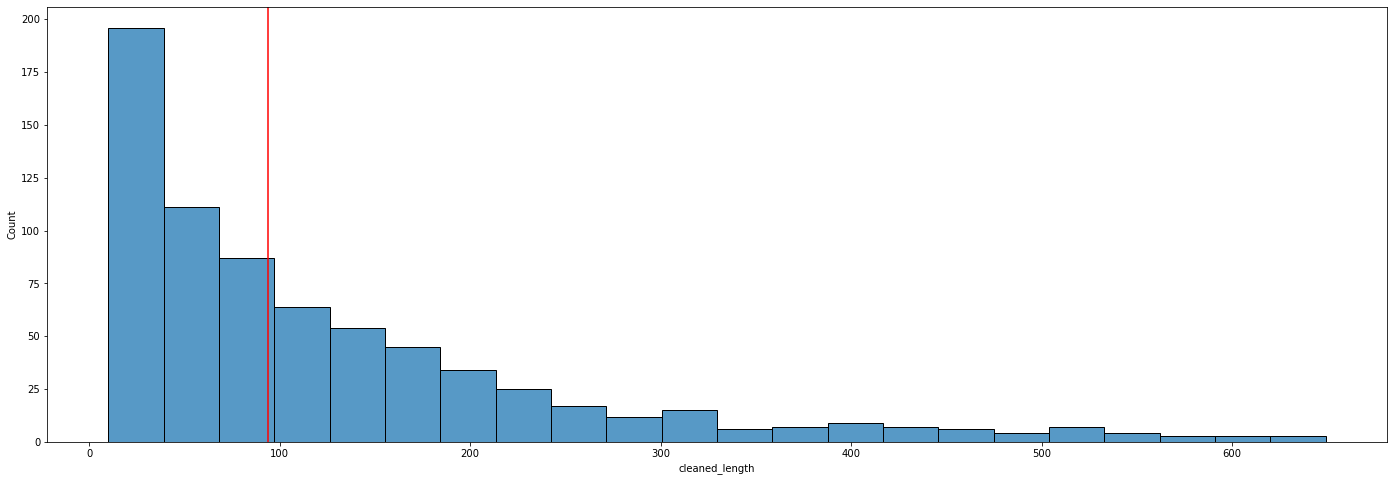

In [61]:
df_removed_high = df[df.cleaned_length < 668]

plt.figure(figsize = (24,8))
sns.histplot(x=df_removed_high.cleaned_length)
plt.axvline(94, c = 'red')
plt.show()